# Making multipanel figures with Matplotlib, quick and easy
## (Work in progress)



### Viktor Sip, 2021

When it comes to making multipanel figures for a publication, some prefer to create every panel separately and put them together in their favorite graphics editor. Doing it all in code however has clear advantages: most importanly, if your data changes, you can simply recreate the figure by running your script without any need for manual intervention. That makes making changes requested by your supervisor, coauthors, or reviewers much faster and less stressful.

Luckily, Matplotlib supports fairly advanced layouting, so creating complex figures is very doable without any need for external editor. It make some time to set it up, but that will pay off the first or second time you change some  analysis element upstream and need to redo the figure with modified data. 

Since I was recently praised for making nice figures this way, I will show you step-by-step how I go about it.

## General principles

- I use Jupyter notebooks as the main environment for the figure development. Using scripts could work too, but the interactive environment where you see the results, and can easily test parts of the code separately works well for me.
- Prepare/preprocess all the data in advance and save it in appropriate format (csv files, pandas dataframe, whatever is appropriate). You do not want to do any heavy computations in the plotting notebook, since you need fast execution to make the development fast and smooth. Just load the preprocessed data in the notebook and focus on the plotting part.

## Figure content

First, figure out what you want to show in a figure. Just because you can put many panels together does not mean you should. As a general rule, stick with **one figure = one concept**, explored from different sides. Sketch out what should be the content of different panels. Think how many panels you need to communicate what you want. Make sure everything holds together well (you should be able to describe the theme of the figure with one short sentence - and you should do that in the first sentence of the figure caption).

Now take a pencil and paper, or a whiteboard, and sketch how the panels should be arranged relative to each other. This might change as you progress, but it is nice to have something to start with.

## Preliminaries

Let us import what needs to be imported, and let also set the font that you want to use. Check the recommendations  of the targeted journal for figure formatting and fonts specifically now. Often specific font families are recommended, as well as minimal font size to be used.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import plot

%matplotlib inline

In [2]:
# Set font sizes
# https://stackoverflow.com/a/39566040/13392466

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('font', **{'family':'sans-serif', 'sans-serif': ['Arial']})

## Figure dimensions

How large should be your figure? Full-page width, column-width? Estimate it, and go see your journal recommendation for how large the figures should be. You might see something like (...)

### Pixels, inches, milimeters, points: what is that about?

Due to the nature of print industry, dealing with both digital and physical media, and long history of this, dimension specification is a huge mess and you will encouter several related units. Quick explainer:
- **Inches** and **milimeters** describe the dimension of the printed image. For some reasons print industry likes to use inches instead of more reasonable units. One inch is 25.4 mm. Matplotlib follows the industry's inch obscession and the `figsize` argument in `plt.figure()` is specified in inches ([although that can be changed](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html)). But Viktor, you ask, what sense does it make to describe vector graphics (that is, perfectly scalable) with physical size in inches or milimeters? Keep reading.
- **Pixels** describe the dimensions of digital *raster* graphics. Here we will be however creating *vector* graphics (that is, scalable without loss of resolution, in formats such as pdf or eps), so pixels will be (mostly) irrelevant to us. In raster graphics, inches and pixels are related through *dots per inch* (DPI) value<sup>1</sup>.  If you are making raster images, you can set `dpi` value as an argument of `plt.figure()` too. This has no effect if you output to vector graphics.
- **Points** is the unit used for font sizes, or things such as line widths or marker sizes. Typographical convention is that 1 point = 1/72 inches, and that is followed also in Matplotlib.

We will create scalable vector graphics, but to make sure that the texts in the figure are legible and appropriately scaled, it is still useful to anchor ourselves to the desired physical dimensions. Set the Matplotlib figure size to dimensions required by the journal (typically around 7.5 inches for full-page width figure) and use font sizes 8-12.

--------------------------
<sup>1</sup> To make things more confusing, sometimes you might encounter term *pixel per inch* (PPI) value instead, with DPI referring to printer dot density in physical prints instead (https://en.wikipedia.org/wiki/Dots_per_inch) 

In [153]:
plt.figure(figsize=(7.5, 3.0), dpi=150)

<Figure size 1125x450 with 0 Axes>

<Figure size 1125x450 with 0 Axes>

Why the `dpi` argument? Jupyter notebook shows the created raster graphics, so this is to make sure that the figure in the notebook will be sufficiently large.

## Panel layout

Now, place the different panels on the figure. Do not bother with the content, empty axes will suffice for now. 

Read about the [different options how to do the layouting](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html) in Matplotlib. Tools that you should definitely know are:
- `plt.subplots()`: regular grid of axes
- `fig.add_axes()`: places a new axes wherever in the figure you specify
- `matplotlib.gridspec.Gridspec` and `fig.add_gridspec()`: grid of axes, but also allowing axes to span multiple columns and rows, and with variable widths and heights, as well as spacing between axes. Note in particular that you can add multiple gridspecs to the same figure, allowing you to do quite complex layouts. That can be handy e.g. when your panels have multiple subplots themselves.

In [8]:
def axbottomleft(ax):
    """Hide the right and top spines
    
    https://stackoverflow.com/a/27361819/13392466
    """
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Embedding sketches

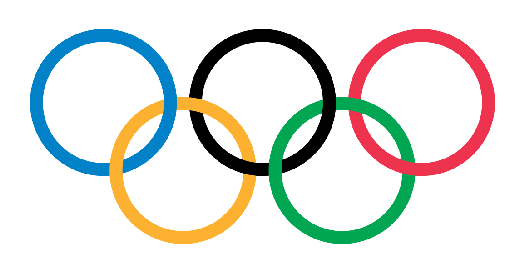

In [9]:
def plot_circles(ax):
    png = plt.imread('./data/1024px-Olympic_rings_without_rims.svg.png')
    plt.sca(ax)
    im = plt.imshow(png, interpolation='none')
    plt.axis('off')
    
plt.figure(figsize=(2,1), dpi=300)
plot_circles(plt.gca())


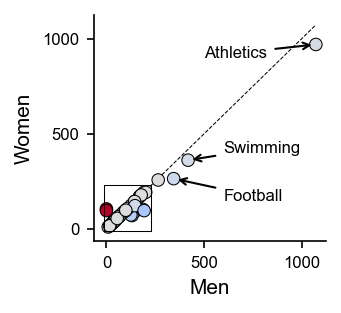

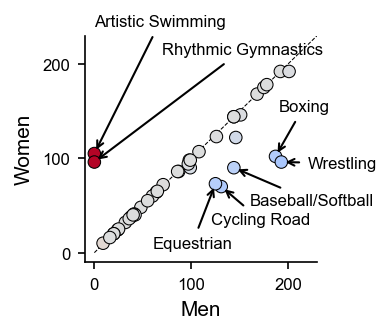

In [142]:
def plot_gender(ax, lim=None, label_dist=0, label_above=0, label_pos=None, cbar_axes=None):
    plt.sca(ax)
    
    df = pd.read_excel("./data/EntriesGender.xlsx")
    s = plt.scatter(df.Male, df.Female, c=(df.Male)/(df.Male+df.Female), cmap='coolwarm_r', vmin=0, vmax=1, 
                    ec='k', lw=0.5)
    max_participants = df[['Male', 'Female']].to_numpy().max()
    plt.plot([0, max_participants], [0, max_participants], color='k', ls='--', zorder=-5, lw=0.5)
    if lim:
        plt.xlim(lim)
        plt.ylim(lim)
    else:
        lim = (-np.inf, np.inf)
    
    plt.xlabel("Men")
    plt.ylabel("Women")

    dff = df[((df.Male - df.Female).abs() > label_dist) & 
             (df[['Male', 'Female']].max(axis=1) > label_above) &
             (df[['Male', 'Female']].max(axis=1) < lim[1])].sort_values('Male')
    
    if label_pos is None:
        label_pos = [None] * len(dff)
    assert len(label_pos) == len(dff)
    
    for i, row in enumerate(dff.itertuples()):
        if lim is None or max(row.Male, row.Female) < lim[1]:
            pos = label_pos[i]
            if pos is None:
                plt.annotate(row.Discipline, xy=(row.Male, row.Female), fontsize=SMALL_SIZE)
            else:
                plt.annotate(row.Discipline, xy=(row.Male, row.Female), xytext=pos, textcoords='data',
                             arrowprops={'arrowstyle': '->'}, fontsize=SMALL_SIZE)
            
    plt.locator_params(axis="both", nbins=3)
    axbottomleft(ax)
   
    # Add colorbar if needed
    if cbar_axes:
        cbar = plt.colorbar(mappable=s, cax=cbar_axes, ticks=[0,1])
        cbar.ax.set_yticklabels(['More women', 'More men'], rotation='vertical')
        cbar.ax.tick_params(length=0)
        ticklabels = cbar.ax.get_yticklabels()
        ticklabels[0].set_va("bottom")
        ticklabels[1].set_va("top")

    return s
    
zoom = (-10, 230)

plt.figure(figsize=(2,2), dpi=150)
plot_gender(plt.gca(), lim=None, label_dist=30, label_above=230, label_pos=[(600, 150), (600, 400), (500, 900)])
plt.plot([zoom[0], zoom[1], zoom[1], zoom[0], zoom[0]], [zoom[0], zoom[0], zoom[1], zoom[1], zoom[0]],
         color='k', lw=0.5)
    
plt.figure(figsize=(2,2), dpi=150)
plot_gender(plt.gca(), lim=zoom, label_dist=30,
            label_pos=((0, 240), (70,210), (60,5), (120,30), (160,50), (190,150), (220,90)))

/home/viktor/soft/anaconda3/envs/py37/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


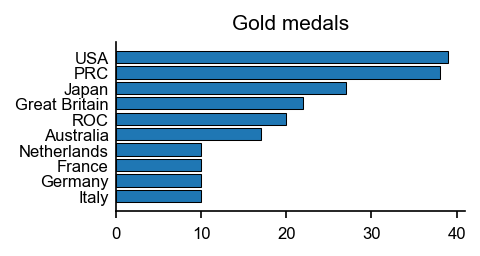

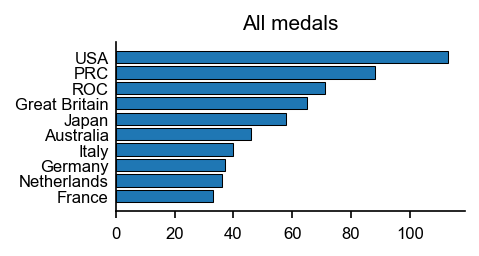

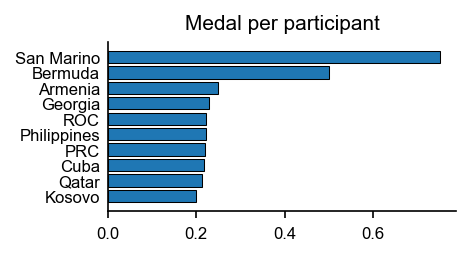

In [143]:
def top_countries(ax, weights=(1,0,0), n=10, title="Score", normalize='none'):
    # Read data
    dfm = pd.read_excel("./data/Medals.xlsx")
    dfa = pd.read_excel("./data/Athletes.xlsx")
    
    # Calculate number of participants per team
    dfm['Participants'] = 0
    nparticipants = dfa.value_counts('NOC')
    for i, row in dfm.iterrows():
        dfm.loc[i, 'Participants'] = nparticipants[row['Team/NOC']]
    
    # Calculate and normalize score
    dfm['Score'] = weights[0]*dfm.Gold + weights[1]*dfm.Silver + weights[2]*dfm.Bronze
    if normalize == 'none': 
        pass
    elif normalize == 'nparticipants':
        dfm.Score = dfm.Score / dfm.Participants
    else:
        raise ValueError(f"Unexpected normalization '{normalize}'")
    
    # Shorten country names so that they fit better
    dfm['Team/NOC'].replace({"United States of America": "USA",
                             "People's Republic of China": "PRC"}, inplace=True)
    
    # Sort
    dfm = dfm.sort_values('Score', ascending=False)
    dff = dfm[:n]

    # Plot
    plt.sca(ax)
    plt.barh(np.r_[:n], dff.Score, ec='k', lw=0.5)
    plt.title(title, fontsize=MEDIUM_SIZE)
    plt.yticks(np.r_[:n], dff["Team/NOC"], rotation='horizontal')
    plt.ylim([n, -1])
    ax.tick_params(axis='y', length=0)
    axbottomleft(ax)
    
    
plt.figure(figsize=(3,1.5), dpi=150)
top_countries(plt.gca(), weights=(1,0,0), title="Gold medals")

plt.figure(figsize=(3,1.5), dpi=150)
top_countries(plt.gca(), weights=(1,1,1), title="All medals")

plt.figure(figsize=(3,1.5), dpi=150)
top_countries(plt.gca(), weights=(1,1,1), normalize='nparticipants', title="Medal per participant")

# Putting everyting together

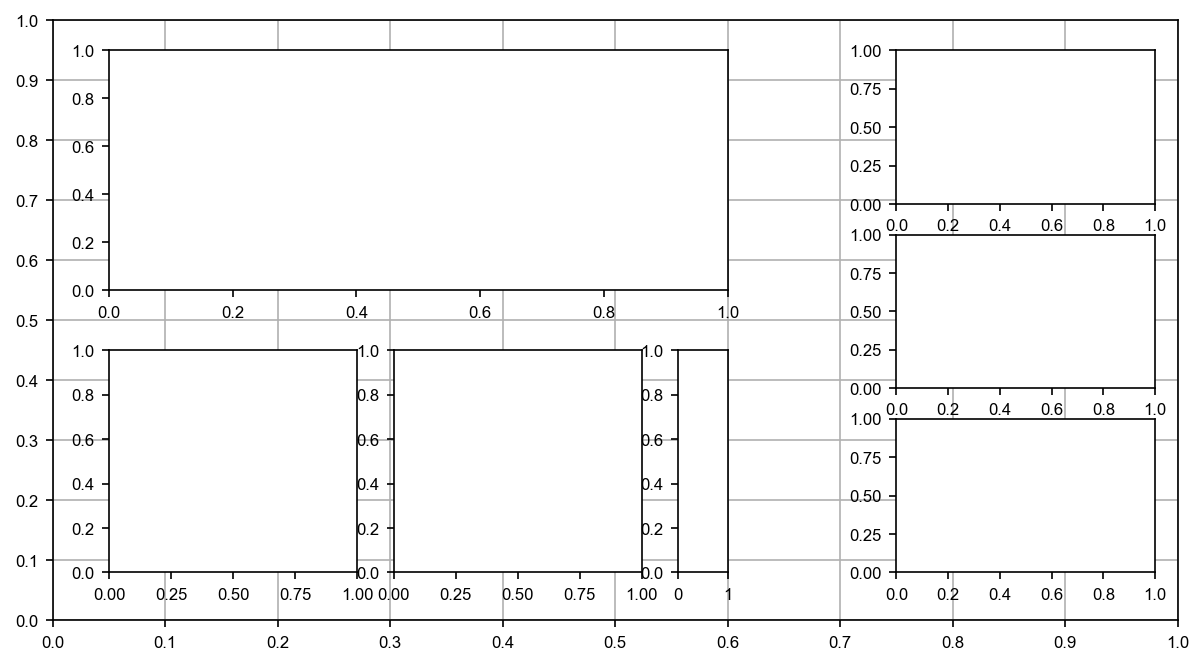

In [144]:
fig = plt.figure(figsize=(7.5, 4.0), dpi=150)


gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.60, bottom=0.55, top=0.95)
gs2 = fig.add_gridspec(nrows=1, ncols=3, width_ratios=(1,1,0.2), left=0.05, right=0.60, bottom=0.08, top=0.45)
gs3 = fig.add_gridspec(nrows=3, ncols=1, left=0.75, right=0.98, bottom=0.08, top=0.95)

# Panel A
ax1 = plt.subplot(gs1[0])

# Panel B
ax2 = plt.subplot(gs2[0])
ax3 = plt.subplot(gs2[1])
ax4 = plt.subplot(gs2[2])

# Panel C
ax4 = plt.subplot(gs3[0])
ax5 = plt.subplot(gs3[1])
ax6 = plt.subplot(gs3[2])


bg = plot.Background(visible=True)

## Add content

/home/viktor/soft/anaconda3/envs/py37/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


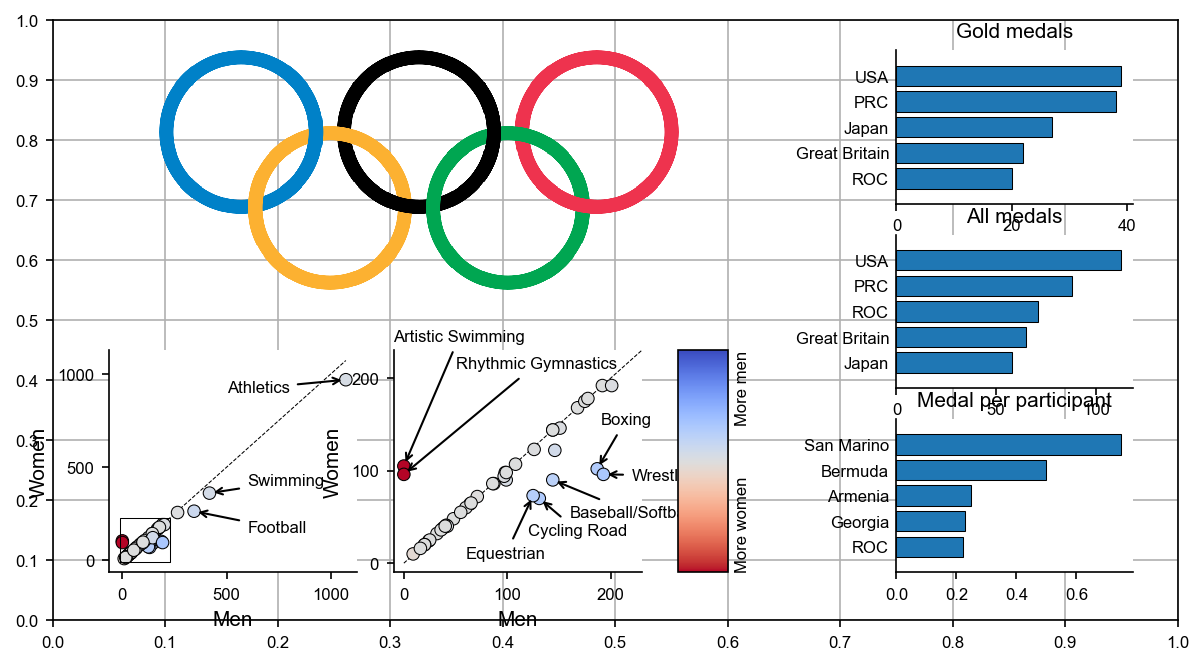

In [147]:
fig = plt.figure(figsize=(7.5, 4.0), dpi=150)

gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.60, bottom=0.55, top=0.95)
gs2 = fig.add_gridspec(nrows=1, ncols=3, width_ratios=(1,1,0.2), left=0.05, right=0.60, bottom=0.08, top=0.45)
gs3 = fig.add_gridspec(nrows=3, ncols=1, left=0.75, right=0.96, bottom=0.08, top=0.95)

# Panel A
ax1 = plt.subplot(gs1[0])
plot_circles(ax1)

# Panel B
ax2 = plt.subplot(gs2[0])
ax3 = plt.subplot(gs2[1])
ax4 = plt.subplot(gs2[2])

zoom = (-10, 230)
plot_gender(ax2, lim=None, label_dist=30, label_above=230, label_pos=[(600, 150), (600, 400), (500, 900)])    
plot_gender(ax3, lim=zoom, label_dist=30, 
            label_pos=((-10,240), (50,210), (60,5), (120,30), (160,50), (190,150), (220,90)),
            cbar_axes=ax4)

# Indicate zoom
plt.sca(ax2)
plt.plot([zoom[0], zoom[1], zoom[1], zoom[0], zoom[0]], [zoom[0], zoom[0], zoom[1], zoom[1], zoom[0]],
         color='k', lw=0.5)


# Panel C
ax4 = plt.subplot(gs3[0])
ax5 = plt.subplot(gs3[1])
ax6 = plt.subplot(gs3[2])

top_countries(ax4, n=5, weights=(1,0,0), title="Gold medals")
top_countries(ax5, n=5, weights=(1,1,1), title="All medals")
top_countries(ax6, n=5, weights=(1,1,1), normalize='nparticipants', title="Medal per participant")

bg = plot.Background(visible=True)

Sure, this is a mess. But it can fixed with a bit of shuffling. Sometimes, however, it is at this stage that you realize that the layout just doesn't work out. Do not despair: Come up with new one and populate it with the same plotting functions you already have.

Let's shuffle then. Specifically, what we do:
- Move left and bottom edges of gs3 in `fig.add_gridspec()`
- Increase vertical space of gs3 in `fig.add_gridspec()` with `hspace`
- Reduce the size of colorbar with `width_ratios` in `fig.add_gridspec()`
- ...

/home/viktor/soft/anaconda3/envs/py37/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


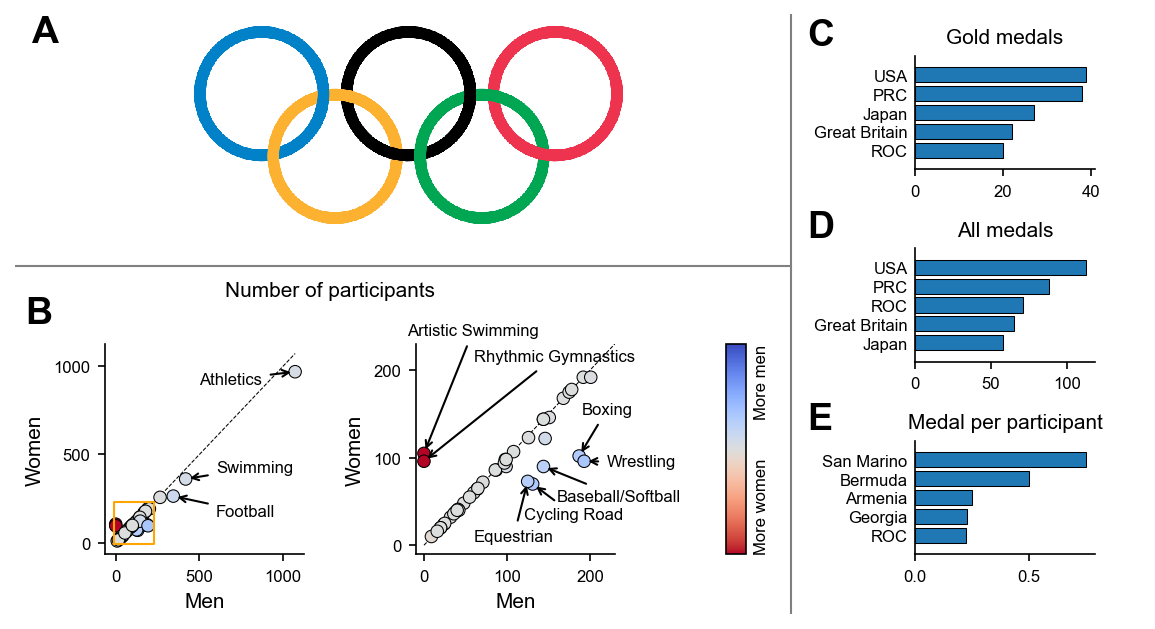

In [152]:
fig = plt.figure(figsize=(7.5, 4.0), dpi=150)

gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.65, bottom=0.65, top=0.98)
gs2 = fig.add_gridspec(nrows=1, ncols=3, left=0.08, right=0.65, bottom=0.1, top=0.45,
                       width_ratios=(1,1,0.1), wspace=0.8)
gs3 = fig.add_gridspec(nrows=3, ncols=1, left=0.8, right=0.96, bottom=0.1, top=0.93, hspace=0.7)

# Panel A
ax1 = plt.subplot(gs1[0])
plot_circles(ax1)

# Panel B
ax2 = plt.subplot(gs2[0])
ax3 = plt.subplot(gs2[1])
ax4 = plt.subplot(gs2[2])

zoom = (-10, 230)
plot_gender(ax2, lim=None, label_dist=30, label_above=230, label_pos=[(600, 150), (600, 400), (500, 900)])    
plot_gender(ax3, lim=zoom, label_dist=30, 
            label_pos=((-20,240), (60,210), (60,5), (120,30), (160,50), (190,150), (220,90)),
            cbar_axes=ax4)

# Indicate zoom
plt.sca(ax2)
plt.plot([zoom[0], zoom[1], zoom[1], zoom[0], zoom[0]], [zoom[0], zoom[0], zoom[1], zoom[1], zoom[0]],
         color='orange', lw=1)

# Panel C
ax5 = plt.subplot(gs3[0])
ax6 = plt.subplot(gs3[1])
ax7 = plt.subplot(gs3[2])

top_countries(ax5, n=5, weights=(1,0,0), title="Gold medals")
top_countries(ax6, n=5, weights=(1,1,1), title="All medals")
top_countries(ax7, n=5, weights=(1,1,1), normalize='nparticipants', title="Medal per participant")

# Lines, annotations, and so
bg = plot.Background(visible=False)
bg.axes.text(0.28, 0.53, "Number of participants", ha='center', fontsize=MEDIUM_SIZE)
bg.hline(0.58, x0=0, x1=0.69)
bg.vline(0.69, y0=0, y1=1)
plot.add_panel_letters(fig, axes=[ax1, ax2, ax5, ax6, ax7], fontsize=18, 
                       xpos=[-0.38,-0.4,-0.6,-0.6,-0.6], ypos=[0.92, 1.1, 1.1, 1.1, 1.1])

## Further reading

Generally on visualization

- https://clauswilke.com/dataviz/
- Edward Tufte: ...

Matplotlib
- https://python4astronomers.github.io/plotting/advanced.html


Excel sucks
- https://doi.org/10.1371/journal.pcbi.1008984
